In [ ]:
# https://data-analysis-expertise.tistory.com/67

In [1]:
# 업비트 API 설치
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 38.8 MB/s 


In [2]:
# 라이브러리
import pyupbit
import pandas as pd
import time
import numpy as np

In [3]:
df = pyupbit.get_ohlcv(ticker='KRW-'+'BTC', interval='minute30', to='20220824 00:30:00', count=10000)

In [4]:
df

,open,high,low,close,volume,value
2022-01-27 19:00:00,45010000.0,45290000.0,44999000.0,45120000.0,120.699604,5.449319e+09
2022-01-27 19:30:00,45120000.0,45140000.0,44641000.0,44680000.0,124.149361,5.571149e+09
2022-01-27 20:00:00,44683000.0,45070000.0,44680000.0,45063000.0,105.043347,4.712414e+09
2022-01-27 20:30:00,45063000.0,45198000.0,44964000.0,45085000.0,208.478363,9.400854e+09
2022-01-27 21:00:00,45080000.0,45174000.0,44968000.0,45069000.0,177.910725,8.025123e+09
...,...,...,...,...,...,...
2022-08-24 07:00:00,29258000.0,29363000.0,29244000.0,29310000.0,48.099327,1.409912e+09
2022-08-24 07:30:00,29308000.0,29316000.0,29246000.0,29251000.0,39.139238,1.145906e+09
2022-08-24 08:00:00,29251000.0,29356000.0,29235000.0,29307000.0,37.481807,1.097833e+09
2022-08-24 08:30:00,29307000.0,29334000.0,29271000.0,29307000.0,59.285443,1.737083e+09


In [5]:
times = df.index
times

DatetimeIndex(['2022-01-27 19:00:00', '2022-01-27 19:30:00',
               '2022-01-27 20:00:00', '2022-01-27 20:30:00',
               '2022-01-27 21:00:00', '2022-01-27 21:30:00',
               '2022-01-27 22:00:00', '2022-01-27 22:30:00',
               '2022-01-27 23:00:00', '2022-01-27 23:30:00',
               ...
               '2022-08-24 04:30:00', '2022-08-24 05:00:00',
               '2022-08-24 05:30:00', '2022-08-24 06:00:00',
               '2022-08-24 06:30:00', '2022-08-24 07:00:00',
               '2022-08-24 07:30:00', '2022-08-24 08:00:00',
               '2022-08-24 08:30:00', '2022-08-24 09:00:00'],
              dtype='datetime64[ns]', length=10000, freq=None)

In [6]:
df.index.value_counts()

2022-01-27 19:00:00    1
2022-06-15 21:30:00    1
2022-06-15 18:00:00    1
2022-06-15 18:30:00    1
2022-06-15 19:00:00    1
                      ..
2022-04-07 07:30:00    1
2022-04-07 08:00:00    1
2022-04-07 08:30:00    1
2022-04-07 09:00:00    1
2022-08-24 09:00:00    1
Length: 10000, dtype: int64

In [7]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'value'], dtype='object')

In [8]:
target_prices = df['close'].values

In [9]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(target_prices) - sequence_length):
    result.append(target_prices[index: index + sequence_length])
    # 51개씩 append 하기, 마지막 하나는 예측하려는 값

In [10]:
target_prices[0: 0 + sequence_length]

array([45120000., 44680000., 45063000., 45085000., 45069000., 45095000.,
       45102000., 45197000., 45201000., 45266000., 45005000., 44865000.,
       44661000., 44689000., 44632000., 44510000., 44290000., 44453000.,
       44468000., 44556000., 44502000., 44218000., 44211000., 44886000.,
       44830000., 45341000., 45500000., 45809000., 45702000., 45709000.,
       45560000., 45564000., 45464000., 45549000., 45869000., 45900000.,
       45878000., 45831000., 45914000., 45760000., 45868000., 45543000.,
       45633000., 45575000., 45411000., 45542000., 45614000., 45445000.,
       45515000., 45563000., 45412000.])

In [11]:
target_prices.shape

(10000,)

In [12]:
len(result)

9949

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

In [14]:
df

,open,high,low,close,volume,value
2022-01-27 19:00:00,45010000.0,45290000.0,44999000.0,45120000.0,120.699604,5.449319e+09
2022-01-27 19:30:00,45120000.0,45140000.0,44641000.0,44680000.0,124.149361,5.571149e+09
2022-01-27 20:00:00,44683000.0,45070000.0,44680000.0,45063000.0,105.043347,4.712414e+09
2022-01-27 20:30:00,45063000.0,45198000.0,44964000.0,45085000.0,208.478363,9.400854e+09
2022-01-27 21:00:00,45080000.0,45174000.0,44968000.0,45069000.0,177.910725,8.025123e+09
...,...,...,...,...,...,...
2022-08-24 07:00:00,29258000.0,29363000.0,29244000.0,29310000.0,48.099327,1.409912e+09
2022-08-24 07:30:00,29308000.0,29316000.0,29246000.0,29251000.0,39.139238,1.145906e+09
2022-08-24 08:00:00,29251000.0,29356000.0,29235000.0,29307000.0,37.481807,1.097833e+09
2022-08-24 08:30:00,29307000.0,29334000.0,29271000.0,29307000.0,59.285443,1.737083e+09


In [15]:
WINDOW_SIZE = 20
time_steps = 20
all_data = df
for_periods = 1

In [16]:
# training & test set 만들기
TEST_SIZE = 2000

ts_train = df[:-TEST_SIZE].values
ts_test = df[-TEST_SIZE:].values
ts_train_len = len(ts_train)
ts_test_len = len(ts_test)

In [17]:
# training 데이터의 samples와 time steps로 원본데이터 슬라이싱하기
X_train_full = []
y_train_full = []
y_train_stacked = []
for i in range(time_steps, ts_train_len - 1):
  X_train_full.append(ts_train[i-time_steps:i,0])
  y_train_full.append(ts_train[i:i+for_periods, 0])
X_train_full, y_train_full = np.array(X_train_full), np.array(y_train_full)

In [18]:
print(X_train_full.shape)
print(y_train_full.shape)

(7979, 20)
(7979, 1)


In [19]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc1 = MinMaxScaler()
X_train_full_scaled = sc.fit_transform(X_train_full)

y_train_full_scaled = sc1.fit_transform(y_train_full)

In [20]:
# 3차원으로 재구성하기
X_train_full_scaled = np.reshape(X_train_full_scaled, (X_train_full_scaled.shape[0], X_train_full_scaled.shape[1], 1))

In [21]:
print(X_train_full_scaled.shape)

(7979, 20, 1)


In [22]:
# Preparing to create X_test
# inputs = sc.transform(df.values)
inputs = df[len(df)-len(ts_test) - time_steps:]
# inputs = inputs.reshape(-1,1)

In [23]:
inputs = np.array(inputs)

In [24]:
X_test = []
for i in range(time_steps, ts_test_len + time_steps - for_periods):
  X_test.append(inputs[i-time_steps:i,0])
X_test = np.array(X_test)

# 스케일링
X_test_scaled = sc.transform(X_test)


X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [25]:
print(X_train_full_scaled.shape)
print(y_train_full_scaled.shape)
print(X_test_scaled.shape)

(7979, 20, 1)
(7979, 1)
(1999, 20, 1)


In [27]:
X_train_see = pd.DataFrame(np.reshape(X_train_full, (X_train_full.shape[0], X_train_full.shape[1])))
y_train_see = pd.DataFrame(y_train_full_scaled)
pd.concat([X_train_see, y_train_see], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0
0,45010000.0,45120000.0,44683000.0,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,...,45005000.0,44864000.0,44661000.0,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,0.612181
1,45120000.0,44683000.0,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,...,44864000.0,44661000.0,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,0.610519
2,44683000.0,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,45005000.0,...,44661000.0,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,44503000.0,0.602065
3,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,45005000.0,44864000.0,...,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,44503000.0,44218000.0,0.599513
4,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,45005000.0,44864000.0,44661000.0,...,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,44503000.0,44218000.0,44132000.0,0.619864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,25768000.0,25832000.0,25939000.0,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,...,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,0.055059
7975,25832000.0,25939000.0,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,...,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,0.056661
7976,25939000.0,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,...,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,0.054763
7977,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,...,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,0.056750


In [28]:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0
1,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0
2,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0,26193000.0
3,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0,26193000.0,26245000.0
4,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0,26193000.0,26245000.0,26100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,29272000.0,29306000.0,29243000.0,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0
1995,29306000.0,29243000.0,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0,29204000.0
1996,29243000.0,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0,29204000.0,29258000.0
1997,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0,29204000.0,29258000.0,29308000.0


In [29]:
print(X_train_full_scaled.shape)
print(X_test_scaled.shape)

(7979, 20, 1)
(1999, 20, 1)


In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full_scaled, y_train_full_scaled, test_size=0.2)

In [31]:
y_train

array([[0.57598861],
       [0.07463882],
       [0.10560978],
       ...,
       [0.7574535 ],
       [0.79845145],
       [0.67450829]])

In [32]:
print('There are '+str(X_train.shape[0]) + ' samples in the training data')
print('There are '+str(X_valid.shape[0]) + ' samples in the validation data')
print('There are '+str(X_test.shape[0]) + ' samples in the test data')

There are 6383 samples in the training data
There are 1596 samples in the validation data
There are 1999 samples in the test data


In [33]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.optimizers import SGD

In [34]:
my_lstm = Sequential()
my_lstm.add(LSTM(units=50,
                 return_sequences=True,
                 input_shape = (X_train.shape[1], 1),
                 activation='tanh'))
my_lstm.add(LSTM(units=50, activation='tanh'))
my_lstm.add(Dense(units=1))

In [83]:
# 컴파일링
my_lstm.compile(optimizer = 'adam',
                loss = 'mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint3.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', save_best_only=True, mode='auto')

history = my_lstm.fit(X_train, y_train, 
                                    epochs=200, batch_size=50,
                                    validation_data=(X_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint],
                                    verbose=1)

Epoch 1/200
128/128 [==============================] - 2s 9ms/step - loss: 4.4420e-05 - val_loss: 4.2275e-05
Epoch 2/200
128/128 [==============================] - 1s 7ms/step - loss: 3.3566e-05 - val_loss: 3.6909e-05
Epoch 3/200
128/128 [==============================] - 1s 6ms/step - loss: 3.5289e-05 - val_loss: 4.2827e-05
Epoch 4/200
128/128 [==============================] - 1s 7ms/step - loss: 3.3968e-05 - val_loss: 3.9736e-05
Epoch 5/200
128/128 [==============================] - 1s 7ms/step - loss: 3.6636e-05 - val_loss: 4.6509e-05
Epoch 6/200
128/128 [==============================] - 1s 7ms/step - loss: 4.0170e-05 - val_loss: 5.6893e-05
Epoch 7/200
128/128 [==============================] - 1s 7ms/step - loss: 3.3311e-05 - val_loss: 3.7064e-05


In [84]:
# loss: 1.2109e-04 - val_loss: 1.1619e-04 => 0.00011619
# loss: 4.9554e-05 - val_loss: 3.8848e-05 => 0.000049554
# loss: 3.6782e-05 - val_loss: 3.9965e-05 => 0.000039965

In [85]:
lstm_prediction = my_lstm.predict(X_test_scaled)
print(lstm_prediction)

[[0.06435466]
 [0.06695302]
 [0.06842481]
 ...
 [0.15865521]
 [0.1601359 ]
 [0.15848613]]


In [86]:
lstm_prediction = sc1.inverse_transform(lstm_prediction)

In [87]:
lstm_prediction.shape

(1999, 1)

In [88]:
lstm_prediction

array([[26092330.],
       [26179918.],
       [26229532.],
       ...,
       [29271108.],
       [29321022.],
       [29265408.]], dtype=float32)

In [89]:
actual_pred = pd.DataFrame(columns = ['close', 'prediction'])
actual_pred['close'] = df.iloc[8000:, 3][0:len(lstm_prediction)]

In [90]:
actual_pred['prediction'] = lstm_prediction[:,0]

In [91]:
actual_pred

,close,prediction
2022-07-13 17:30:00,26192000.0,26092330.0
2022-07-13 18:00:00,26243000.0,26179918.0
2022-07-13 18:30:00,26100000.0,26229532.0
2022-07-13 19:00:00,26056000.0,26277006.0
2022-07-13 19:30:00,26083000.0,26134164.0
...,...,...
2022-08-24 06:30:00,29268000.0,29270492.0
2022-08-24 07:00:00,29310000.0,29218400.0
2022-08-24 07:30:00,29251000.0,29271108.0
2022-08-24 08:00:00,29307000.0,29321022.0


In [92]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(actual_pred['close'].values, actual_pred.iloc[:,1].values)**0.5

In [93]:
RMSE

168841.36409017167

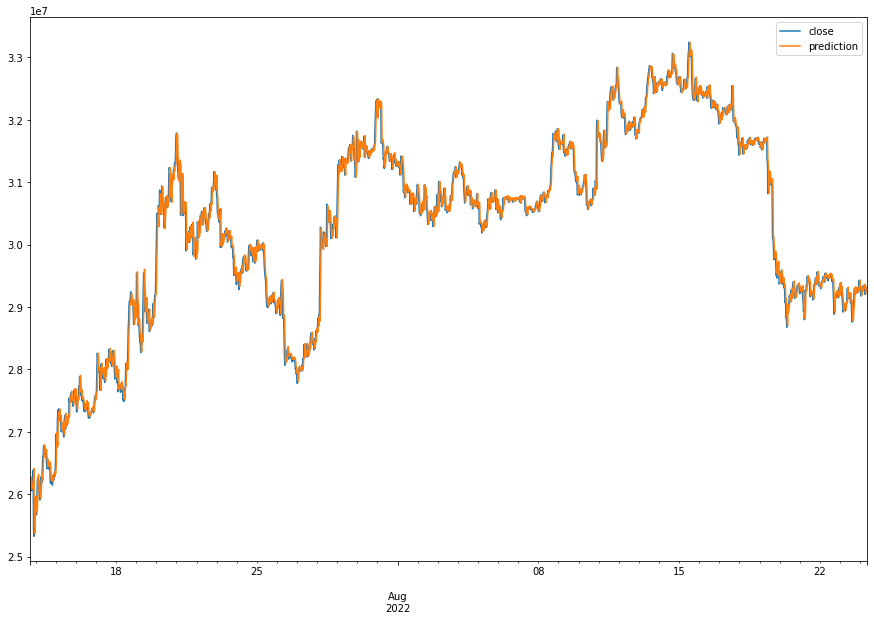

In [94]:
actual_pred.plot(figsize=(15,10))

1. epochs=50, batch_size=150
  - 275439.52345427184
2. epochs=200, batch_size=150
  - 171843.0667881005
3. epochs=200, batch_size=10
  - 199390.26176509066
4. epochs=200, batch_size=50
  - 169020.27407099277